# Model-Motivation Summary

* This version is updated on 1/12/2023

* Major updates: 
    - update refreshing memory -> encoding
    
    - add motivation check in refreshing
        if m < 0, skip refreshing
        if m > 0, like model 2, refresh
    
* Main takeaways:

    - To replicate model1, has to be n = 500, reward should be greater r=10, actr_params1={'seed':'nil', 'ans':0.2, 'egs':0.5, 'alpha':0.2, 'v':'nil', 'lf':1, 'bll':0.5, 'mas':2}
    
    - To replicate model2, has to be n < 200, otherwiaw will all becomes [1 1 11 ]
    - to replacate model1, need to make change, refresh infinite until run out of resources. work for model1. let's try model2, ans must be > 0.5, otherwise, will always be [1,1,1,1]
    - to replicate model2, actr_params2={'seed':'nil', 'ans':0.7, 'egs':0.5, 'alpha':0.2, 'v':'nil', 'lf':.5, 'bll':0.5, 'mas':2}
    
    - problem: common RT > rare RT


        

In [1]:
import sys
import os

SCRIPT_PATH = os.path.join(os.path.abspath(os.path.dirname('../__file__')), 'script')
sys.path.insert(0, SCRIPT_PATH)

#from markov_device import *
from markov_simulate_test import *
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from tqdm import tqdm
import pandas.api.types as pdtypes

%matplotlib inline

ACT-R connection has been started.


In [2]:
model_name="markov-model3"
m_value1 = 0
m_value2 = 6

m_list = np.arange(m_value1, m_value2+1, 3)

main_dir = os.path.dirname(os.getcwd())
dest_dir = os.path.join(os.getcwd(), '__cache__', 'test', model_name)
main_dir, dest_dir

('/Users/cheryang/Documents/GitProject/ACTR-MarkovTask',
 '/Users/cheryang/Documents/GitProject/ACTR-MarkovTask/analysis/__cache__/test/markov-model3')

#|Warning: Changing declarative parameters with chunks in dm not supported. |#
#|Warning: Results may not be what one expects. |#
#|Warning: Changing declarative parameters with chunks in dm not supported. |#
#|Warning: Results may not be what one expects. |#
     0.050   PROCEDURAL             PRODUCTION-FIRED PREPARE-WM
INIT MOTIVATION 2 TIME-ONSET 0.0 PRE-REWARD 0.0
     1.050   PROCEDURAL             PRODUCTION-FIRED FIND-SCREEN
     1.185   PROCEDURAL             PRODUCTION-FIRED PROCESS-FIXATION
T 1.185 UPDATED-MOTIVATION 2
     2.135   PROCEDURAL             PRODUCTION-FIRED FIND-SCREEN
     2.270   PROCEDURAL             PRODUCTION-FIRED ATTEND-STATE1
     2.520   PROCEDURAL             PRODUCTION-FIRED PLAN-START
MOTIVATION 2 CURR TIME 2.52 UPDATED-MOTIVATION 0.66499996
     2.570   PROCEDURAL             PRODUCTION-FIRED PLAN-BACKWARD-AT-STAGE1-START
MOTIVATION 2 CURR TIME 2.57 UPDATED-MOTIVATION 0.615
     2.704   PROCEDURAL             PRODUCTION-FIRED PLAN-BACKWARD-AT-STAG

In [3]:
overwrite= True
if overwrite:
    try:
        for d in glob.glob(os.path.dirname(dest_dir)):
            shutil.rmtree(d) 
            print('deleting...[%s]' % (d))
    except:
        print('no file found...')

deleting...[/Users/cheryang/Documents/GitProject/ACTR-MarkovTask/analysis/__cache__/test]


In [4]:
r = (2, 0)
task_params={'REWARD': {'B1': r, 'B2': r, 'C1':r, 'C2': r}, 'RANDOM_WALK':'LOAD', 'M':1}
actr_params={'v':'nil', 'ans':0.2, 'egs':0.2, 'alpha':0.2, 'lf': 0.5, 'bll': 0.5}

e=1
n=20

In [5]:
try:
    df31_state1stay=pd.read_csv(os.path.join(dest_dir + '-m%d' % (m_value1), model_name+'-sim-staydata.csv'), index_col=0)
    df32_state1stay=pd.read_csv(os.path.join(dest_dir + '-m%d' % (m_value2), model_name+'-sim-staydata.csv'), index_col=0)
except FileNotFoundError:
    for m in m_list:
        task_params['M'] = m
        Simulation.simulate_stay_probability(model=model_name, epoch=e, n=n, task_params=task_params, actr_params=actr_params, log=dest_dir + '-m%d' % (m), thresh=0, verbose=0)
finally:
    df31_state1stay=pd.read_csv(os.path.join(dest_dir + '-m%d' % (m_value1), model_name+'-sim-staydata.csv'), index_col=0)
    df32_state1stay=pd.read_csv(os.path.join(dest_dir + '-m%d' % (m_value2), model_name+'-sim-staydata.csv'), index_col=0)

...ESTIMATED RUN TIME [0.01] (min)...
...ESTIMATED RUN TIME [0.01] (min)...
...ESTIMATED RUN TIME [0.01] (min)...


## Stay Probability

In [6]:
df31stay_aggregate  = df31_state1stay.groupby(['epoch', 'pre_received_reward', 'pre_state_frequency']).agg(state1_stay_mean=('state1_stay', 'mean'),
                                                                                        state1_stay_sd=('state1_stay', 'std'),
                                                                                        state1_stay_se=('state1_stay', 'sem')).reset_index()

df32stay_aggregate  = df32_state1stay.groupby(['epoch', 'pre_received_reward', 'pre_state_frequency']).agg(state1_stay_mean=('state1_stay', 'mean'),
                                                                                        state1_stay_sd=('state1_stay', 'std'),
                                                                                        state1_stay_se=('state1_stay', 'sem')).reset_index()


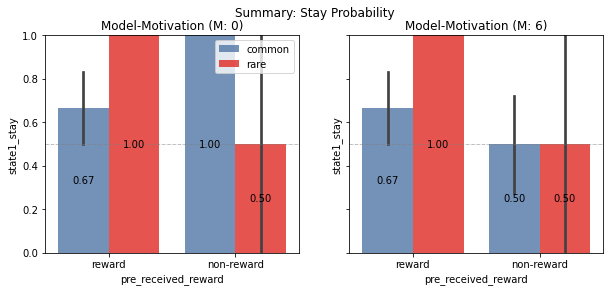

In [7]:
my_palette = sns.color_palette(["#4374B3", "#FF0B04"])

fig, axes = plt.subplots(1, 2, figsize=(10,4), sharex=True, sharey=True)
fig.suptitle('Summary: Stay Probability')
sns.barplot(data=df31_state1stay, x='pre_received_reward', y='state1_stay',
            hue='pre_state_frequency', palette=my_palette, alpha=.8,
            order = ['reward', 'non-reward'],
            hue_order=['common', 'rare'], errorbar='se',
            ax=axes[0]) 

sns.barplot(data=df32_state1stay, x='pre_received_reward', y='state1_stay',
            hue='pre_state_frequency', palette=my_palette, alpha=.8,
            order = ['reward', 'non-reward'],
            hue_order=['common', 'rare'], errorbar='se',
            ax=axes[1]) 

for ax in axes:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='center')
    ax.axhline(0.5, color='grey', ls='-.', linewidth=.5)    

axes[0].legend(loc=1)
axes[1].get_legend().remove() 
axes[0].set_title('Model-Motivation (M: %.d)' % (m_value1))
axes[1].set_title('Model-Motivation (M: %.d)' % (m_value2))
axes[0].set_ylim(0,1)
plt.show()


## Simulation Results: Effect

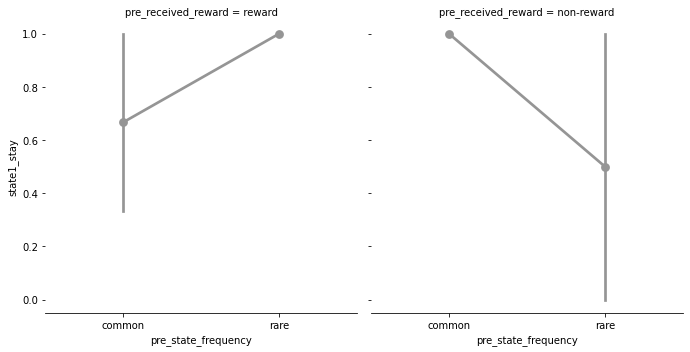

In [8]:
ax = sns.catplot(data=df31_state1stay, x='pre_state_frequency', y='state1_stay', kind='point',
            row=None, col='pre_received_reward', col_order = sorted(df31_state1stay['pre_received_reward'].unique(), reverse=True), 
            margin_titles=True, hue='epoch', palette='Greys', dodge=.4) 
# ax.set(ylim=(0.5,1))
ax.despine(left=True)
ax._legend.remove()
plt.show()

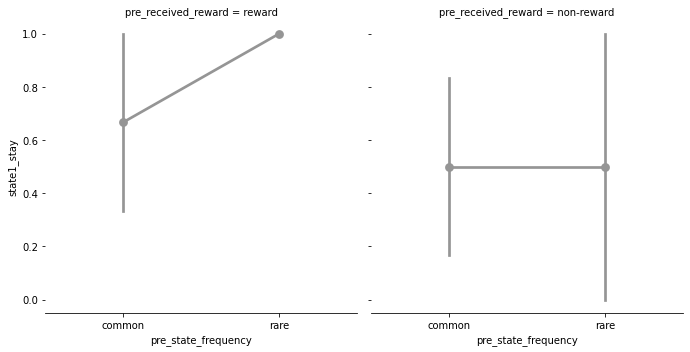

In [9]:
ax = sns.catplot(data=df32_state1stay, x='pre_state_frequency', y='state1_stay', kind='point',
            row=None, col='pre_received_reward', col_order = sorted(df32_state1stay['pre_received_reward'].unique(), reverse=True), 
            margin_titles=True, hue='epoch', palette='Greys', dodge=.4) 
# ax.set(ylim=(0.7, 1))
ax.despine(left=True)
ax._legend.remove()
plt.show()

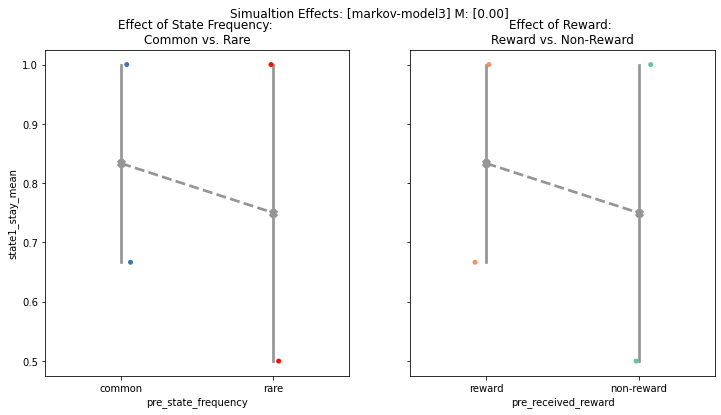

In [10]:
reward_order=df31stay_aggregate['pre_received_reward'].sort_values(ascending=False).unique()

fig, axes = plt.subplots(1,2,figsize=(12,6), sharey=True)
fig.suptitle('Simualtion Effects: [%s] M: [%.2f]' % (model_name, m_value1))

    
sns.stripplot(data=df31stay_aggregate, x='pre_state_frequency', y='state1_stay_mean', 
            order=['common', 'rare'],  hue='pre_state_frequency', palette=my_palette, ax=axes[0])
sns.pointplot(data=df31stay_aggregate, x='pre_state_frequency', y='state1_stay_mean', 
              order=['common', 'rare'],  hue='epoch', palette='Greys', 
              markers='X', linestyles='--', ax=axes[0]) 

sns.stripplot(data=df31stay_aggregate, x='pre_received_reward', y='state1_stay_mean', 
              order=reward_order,  hue='pre_received_reward', palette='Set2', ax=axes[1])
sns.pointplot(data=df31stay_aggregate, x='pre_received_reward', y='state1_stay_mean', 
              order=reward_order,  hue='epoch', palette='Greys', 
              markers='X', linestyles='--', ax=axes[1]) 

axes[0].set_title('Effect of State Frequency: \nCommon vs. Rare')
axes[1].set_title('Effect of Reward: \nReward vs. Non-Reward')
axes[0].get_legend().remove()
axes[1].get_legend().remove()
plt.show()

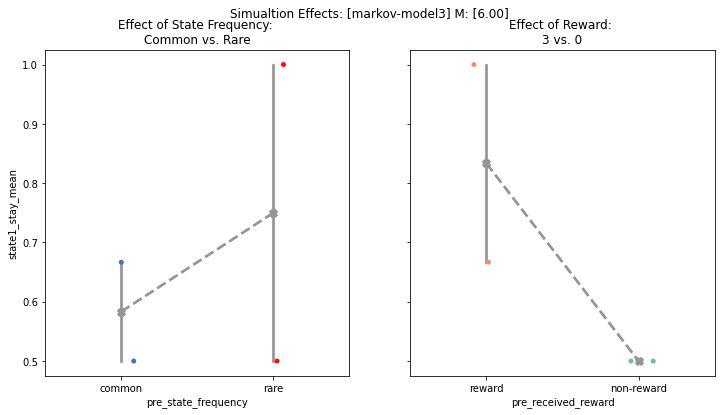

In [11]:
fig, axes = plt.subplots(1,2,figsize=(12,6), sharey=True)
fig.suptitle('Simualtion Effects: [%s] M: [%.2f]' % (model_name, m_value2))
    
sns.stripplot(data=df32stay_aggregate, x='pre_state_frequency', y='state1_stay_mean', 
            order=['common', 'rare'],  hue='pre_state_frequency', palette=my_palette, ax=axes[0])
sns.pointplot(data=df32stay_aggregate, x='pre_state_frequency', y='state1_stay_mean', 
              order=['common', 'rare'],  hue='epoch', palette='Greys', 
              markers='X', linestyles='--', ax=axes[0]) 

sns.stripplot(data=df32stay_aggregate, x='pre_received_reward', y='state1_stay_mean', 
              order=reward_order,  hue='pre_received_reward', palette='Set2', ax=axes[1])
sns.pointplot(data=df32stay_aggregate, x='pre_received_reward', y='state1_stay_mean', 
              order=reward_order,  hue='epoch', palette='Greys', 
              markers='X', linestyles='--', ax=axes[1]) 

axes[0].set_title('Effect of State Frequency: \nCommon vs. Rare')
axes[1].set_title('Effect of Reward: \n3 vs. 0')
axes[0].get_legend().remove()
axes[1].get_legend().remove()
plt.show()

## Response Time

### RT by State Frequency

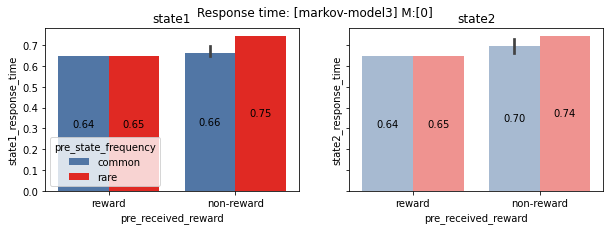

In [12]:
fig, axes = plt.subplots(1,2, figsize=(10,3), sharey=True, sharex=True)
fig.suptitle('Response time: [%s] M:[%s]' % (model_name, m_value1))
sns.barplot(data=df31_state1stay, x='pre_received_reward', y='state1_response_time', hue='pre_state_frequency', palette=my_palette, alpha=1, ax=axes[0])
sns.barplot(data=df31_state1stay, x='pre_received_reward', y='state2_response_time', hue='pre_state_frequency', palette=my_palette, alpha=.5, ax=axes[1])
axes[0].set_title('state1')
axes[1].set_title('state2')
for ax in axes:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='center')

axes[1].get_legend().remove()
plt.show()

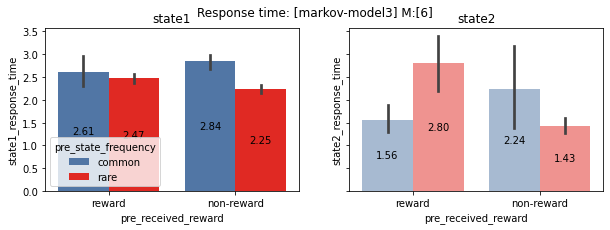

In [13]:
fig, axes = plt.subplots(1,2, figsize=(10,3), sharey=True, sharex=True)
fig.suptitle('Response time: [%s] M:[%s]' % (model_name, m_value2))
sns.barplot(data=df32_state1stay, x='pre_received_reward', y='state1_response_time', hue='pre_state_frequency', palette=my_palette, alpha=1, ax=axes[0])
sns.barplot(data=df32_state1stay, x='pre_received_reward', y='state2_response_time', hue='pre_state_frequency', palette=my_palette, alpha=.5, ax=axes[1])
axes[0].set_title('state1')
axes[1].set_title('state2')
for ax in axes:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='center')

axes[1].get_legend().remove()
plt.show()

# Learning Performance

In [14]:
df31 = pd.read_csv(os.path.join(dest_dir + '-m%d' % (m_value1), model_name+'-sim-logdata.csv'), index_col=0)
df32 = pd.read_csv(os.path.join(dest_dir + '-m%d' % (m_value2), model_name+'-sim-logdata.csv'), index_col=0)

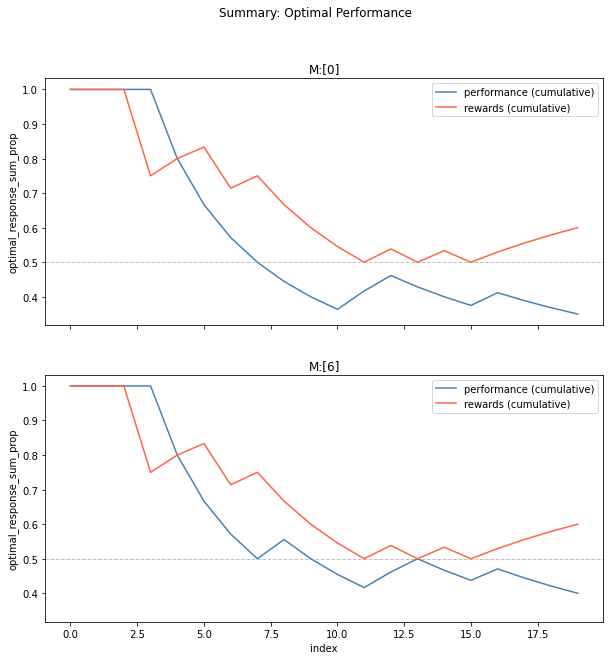

In [15]:
fig, axes = plt.subplots(2,1, sharex=True, sharey=True, figsize=(10,10))
fig.suptitle('Summary: Optimal Performance')
sns.lineplot(data=df31, x='index', y='optimal_response_sum_prop',  label='performance (cumulative)', color='steelblue', ax=axes[0])
sns.lineplot(data=df31, x='index', y='received_reward_sum_prop', label='rewards (cumulative)', color='tomato', ax=axes[0])

sns.lineplot(data=df32, x='index', y='optimal_response_sum_prop',  label='performance (cumulative)', color='steelblue', ax=axes[1])
sns.lineplot(data=df32, x='index', y='received_reward_sum_prop', label='rewards (cumulative)', color='tomato', ax=axes[1])

axes[0].set_title('M:[%s]' % (m_value1))
axes[1].set_title('M:[%s]' % (m_value2))
axes[0].axhline(0.5, color='grey', ls='-.', linewidth=.5) 
axes[1].axhline(0.5, color='grey', ls='-.', linewidth=.5) 
plt.show()

## ACT-R Traces


In [16]:
df31_utrace = pd.read_csv(os.path.join(dest_dir + '-m%d' % (m_value1), model_name+'-actr-udata.csv'), index_col=0)
df32_utrace = pd.read_csv(os.path.join(dest_dir + '-m%d' % (m_value2), model_name+'-actr-udata.csv'), index_col=0)

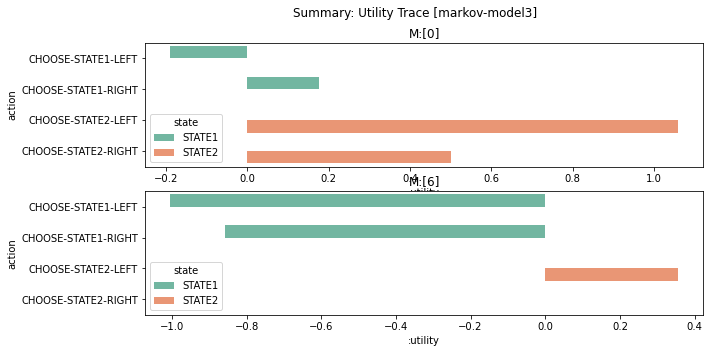

In [17]:
fig, axes = plt.subplots(2,1,figsize=(10,5))
fig.suptitle('Summary: Utility Trace [%s]' %(model_name))
sns.barplot(data=df31_utrace, y='action', x=':utility', hue='state', palette='Set2', ax=axes[0]) 
sns.barplot(data=df32_utrace, y='action', x=':utility', hue='state', palette='Set2', ax=axes[1]) 
axes[0].set_title('M:[%s]' % (m_value1))
axes[1].set_title('M:[%s]' % (m_value2))
plt.show()

# Activation Trace

In [18]:
df31_atrace = pd.read_csv(os.path.join(dest_dir + '-m%d' % (m_value1), model_name+'-actr-adata.csv'), index_col=0)
dfm31 = Simulation.process_memory_data(df31)

df32_atrace = pd.read_csv(os.path.join(dest_dir + '-m%d' % (m_value2), model_name+'-actr-adata.csv'), index_col=0)
dfm32 = Simulation.process_memory_data(df32)

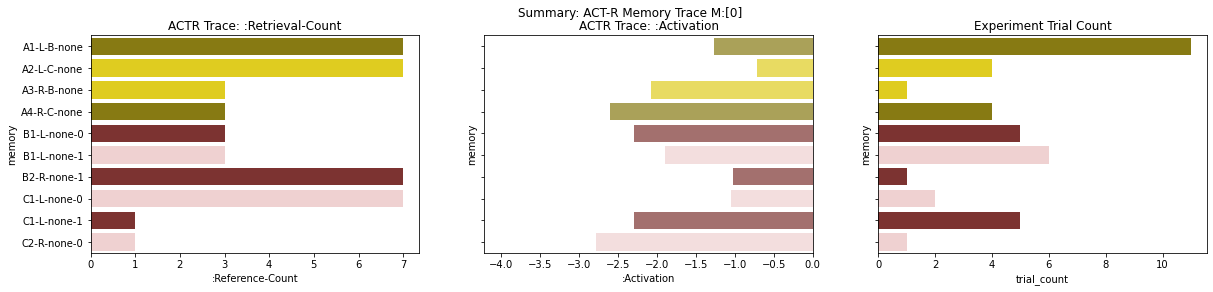

In [19]:
reward_palette1 = sns.color_palette(['#f4cccc', '#882724'])
my_chunk_palette = sns.color_palette(["#9a8900", "#ffe500", "#ffe500", "#9a8900"]+['#882724', '#f4cccc']*4)
chunk_order = df31_atrace['memory'].sort_values().unique()

fig, axes = plt.subplots(1,3, figsize=(20,4), sharey=True)
fig.suptitle('Summary: ACT-R Memory Trace M:[%d]' %(m_value1))
sns.barplot(data = df31_atrace, y='memory', x=':Reference-Count', order=chunk_order, palette=my_chunk_palette, ax=axes[0])
sns.barplot(data =df31_atrace, y='memory', x=':Activation', alpha=.7, order=chunk_order, palette=my_chunk_palette, errorbar='se', ax=axes[1])
sns.barplot(data=dfm31, y='memory', x='trial_count', order= dfm31['memory'].sort_values().unique(), palette=my_chunk_palette, ax=axes[2])

axes[0].set_title('ACTR Trace: :Retrieval-Count') 
axes[1].set_title('ACTR Trace: :Activation') 
axes[2].set_title('Experiment Trial Count')  
plt.show()

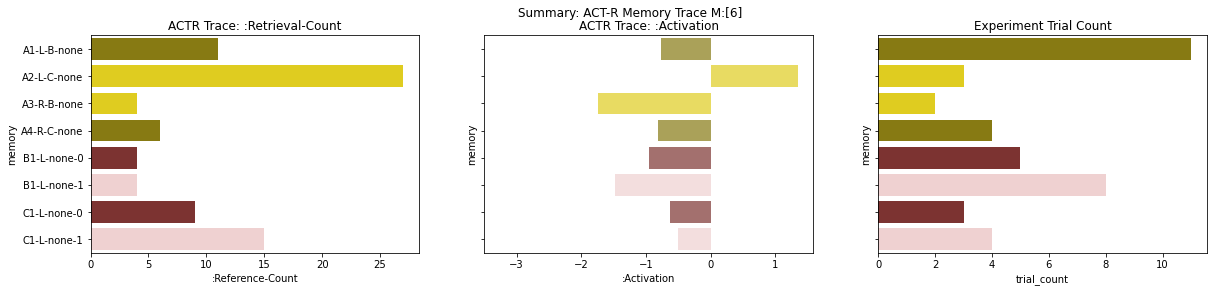

In [20]:
reward_palette1 = sns.color_palette(['#f4cccc', '#882724'])
my_chunk_palette = sns.color_palette(["#9a8900", "#ffe500", "#ffe500", "#9a8900"]+['#882724', '#f4cccc']*4)
chunk_order = df32_atrace['memory'].sort_values().unique()

fig, axes = plt.subplots(1,3, figsize=(20,4), sharey=True)
fig.suptitle('Summary: ACT-R Memory Trace M:[%d]' %(m_value2))
sns.barplot(data = df32_atrace, y='memory', x=':Reference-Count', order=chunk_order, palette=my_chunk_palette, ax=axes[0])
sns.barplot(data =df32_atrace, y='memory', x=':Activation', alpha=.7, order=chunk_order, palette=my_chunk_palette, errorbar='se', ax=axes[1])
sns.barplot(data=dfm32, y='memory', x='trial_count', order= dfm32['memory'].sort_values().unique(), palette=my_chunk_palette, ax=axes[2])

axes[0].set_title('ACTR Trace: :Retrieval-Count') 
axes[1].set_title('ACTR Trace: :Activation') 
axes[2].set_title('Experiment Trial Count')  
plt.show()